In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

url = "/content/dataset.csv"
df = pd.read_csv(url)

df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


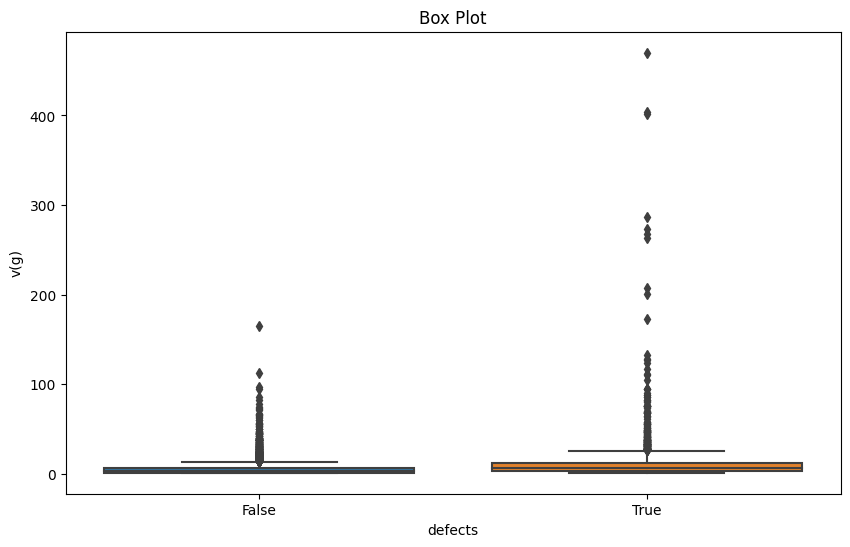

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='defects', y='v(g)', data=df)
plt.title('Box Plot')
plt.show()

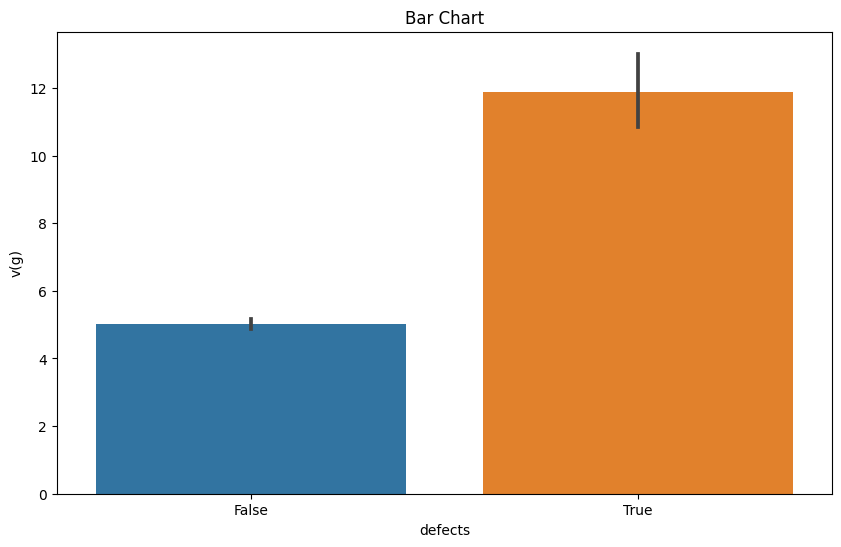

In [ ]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='defects', y='v(g)', data=df)
plt.title('Bar Chart')
plt.show()

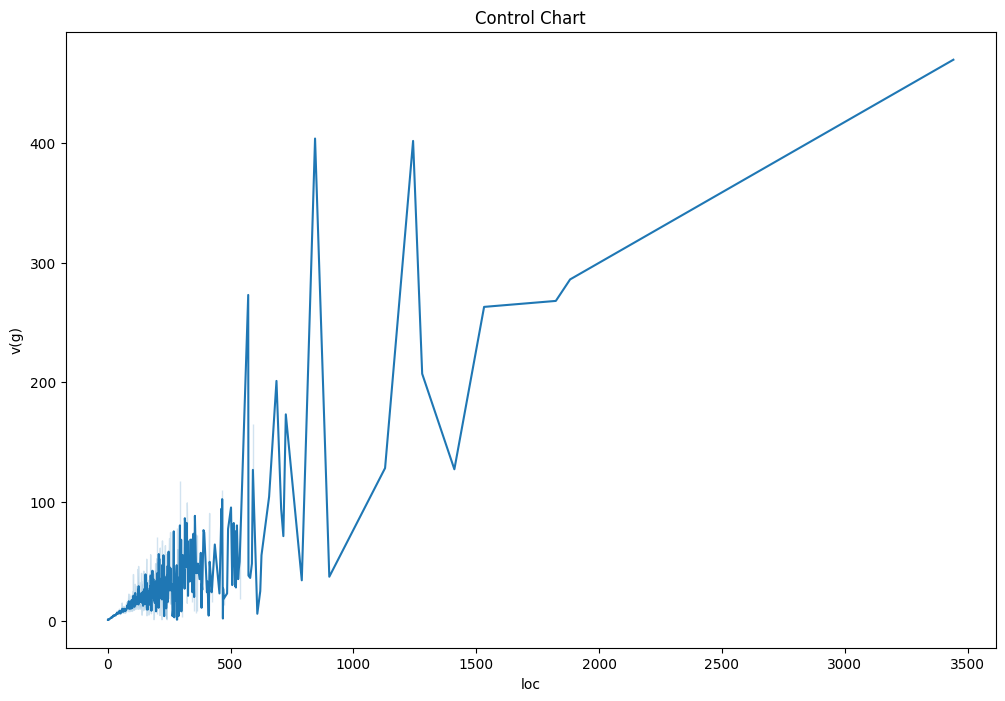

In [ ]:
# Control chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='loc', y='v(g)', data=df)
plt.title('Control Chart')
plt.show()

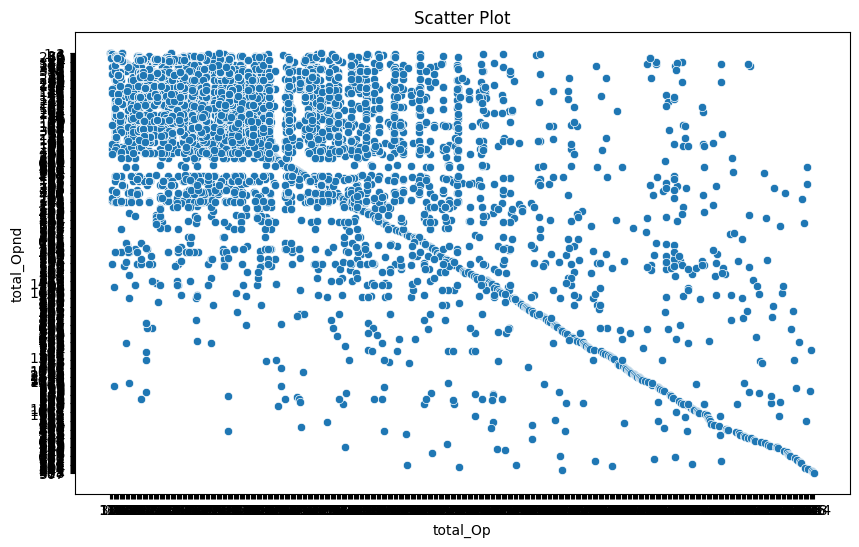

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_Op', y='total_Opnd', data=df)
plt.title('Scatter Plot')
plt.show()

In [ ]:
correlation_matrix = df.corr()

correlation_matrix

<ipython-input-29-6db996663f03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.086036


In [ ]:
robust_corr_matrix = df.corr(method='spearman')

robust_corr_matrix

<ipython-input-30-51291e1cb8c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  robust_corr_matrix = df.corr(method='spearman')


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
loc,1.000000,0.808672,0.487406,0.746069,0.673119,0.674996,-0.725328,0.614088,0.548448,0.665855,0.688044,0.665851,0.698820,0.546311,0.677974,0.320850,0.296378
v(g),0.808672,1.000000,0.688867,0.832268,0.534250,0.538055,-0.709530,0.570381,0.338892,0.563718,0.549715,0.563723,0.558497,0.378090,0.461919,0.294244,0.239150
ev(g),0.487406,0.688867,1.000000,0.520918,0.283728,0.287015,-0.495889,0.333189,0.132378,0.313413,0.295101,0.313429,0.276041,0.253084,0.238266,0.196897,0.165189
iv(g),0.746069,0.832268,0.520918,1.000000,0.530629,0.536260,-0.574317,0.509328,0.427165,0.536485,0.545852,0.536491,0.548265,0.374440,0.465881,0.281758,0.243420
n,0.673119,0.534250,0.283728,0.530629,1.000000,0.999257,-0.282583,0.944368,0.880604,0.991103,0.996755,0.991101,0.971330,0.577262,0.857742,0.357003,0.172759
v,0.674996,0.538055,0.287015,0.536260,0.999257,1.000000,-0.279542,0.941352,0.886003,0.990246,0.997494,0.990244,0.972220,0.577586,0.859661,0.357638,0.175018
l,-0.725328,-0.709530,-0.495889,-0.574317,-0.282583,-0.279542,1.000000,-0.338242,-0.039387,-0.316487,-0.301742,-0.316486,-0.260030,-0.246560,-0.271101,-0.186665,-0.194914
d,0.614088,0.570381,0.333189,0.509328,0.944368,0.941352,-0.338242,1.000000,0.701299,0.978363,0.938616,0.978363,0.920847,0.537729,0.807454,0.345371,0.145045
i,0.548448,0.338892,0.132378,0.427165,0.880604,0.886003,-0.039387,0.701299,1.000000,0.819831,0.883082,0.819826,0.858136,0.508625,0.766020,0.297271,0.161339
e,0.665855,0.563718,0.313413,0.536485,0.991103,0.990246,-0.316487,0.978363,0.819831,1.000000,0.987736,0.999999,0.964765,0.570558,0.850088,0.358487,0.167172


In [ ]:
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce')
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce')

df.dropna(subset=['total_Op', 'total_Opnd'], inplace=True)

print(df[['total_Op', 'total_Opnd']].dtypes)

X = df[['total_Op']]
y = df['total_Opnd']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

total_Op      float64
total_Opnd    float64
dtype: object
Intercept: 2.509295450420737
Coefficient: 0.6442418815791339


In [ ]:
huber_model = HuberRegressor()
huber_model.fit(X, y)

print('Intercept (Robust):', huber_model.intercept_)
print('Coefficient (Robust):', huber_model.coef_[0])

Intercept (Robust): -0.04003107230116911
Coefficient (Robust): 0.6810460565843277


In [ ]:
X_multi = df[['total_Op', 'v(g)', 'loc']]
multi_model = LinearRegression()
multi_model.fit(X_multi, y)

print('Intercept (Multivariate):', multi_model.intercept_)
print('Coefficients (Multivariate):', multi_model.coef_)

Intercept (Multivariate): 2.1993915813903726
Coefficients (Multivariate): [ 0.62230873 -0.84398211  0.17042214]


In [ ]:
features = ['v(g)', 'n', 'total_Opnd']

df_std = (df[features] - df[features].mean()) / df[features].std()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pc_df.head()

,PC1,PC2
0,-0.743148,0.015646
1,-0.761314,-0.009146
2,0.464168,-0.232680
3,2.373593,-1.793092
4,-0.045844,-0.183110


from matplotlib import pyplot as plt
_df_11['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)